In [80]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re
import os

## CONSTANTS FOR THIS FILE

In [34]:
labelled_data_path = "/data/labelled/labelled_data.csv"
to_keep = ['title', 'abstract','categories', 'authors']

## LOADING DATA FILE , FILTERING UNNECESSARY FIELDS

In [70]:
data = pd.read_csv(os.path.dirname(os.getcwd())+labelled_data_path)
data = data[to_keep]
data.head()

,title,abstract,categories,authors
0,Calculating Valid Domains for BDD-Based Intera...,In these notes we formally describe the func...,cs.AI,"Tarik Hadzic, Rune Moller Jensen, Henrik Reif ..."
1,A study of structural properties on profiles HMMs,Motivation: Profile hidden Markov Models (pH...,cs.AI,"Juliana S Bernardes, Alberto Davila, Vitor San..."
2,Narratives within immersive technologies,The main goal of this project is to research...,cs.HC,Joan Llobera
3,Bayesian approach to rough set,This paper proposes an approach to training ...,cs.AI,Tshilidzi Marwala and Bodie Crossingham
4,Une plate-forme dynamique pour l'\'evaluation ...,In object-oriented or object-relational data...,cs.DB,"Zhen He, J\'er\^ome Darmont (ERIC)"


## CHECKING LABEL DISTRIBUTION

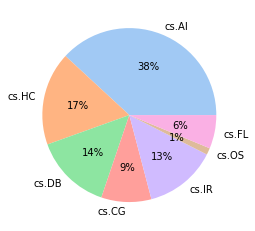

In [36]:
dist = dict(Counter(data['categories']))
labels = dist.keys()
counts = dist.values()
colors = sns.color_palette('pastel')[0:7]
plt.pie(counts, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

## AVERAGE CORPUS RAW TITLE LENGTH & DISTRIBUTION

Average Corpus Title Length =  9.238165539575197
Maximum Corpus Title Length =  38
Minimum Corpus Title Length =  1


Distribution of count values: 


<AxesSubplot:ylabel='Count'>

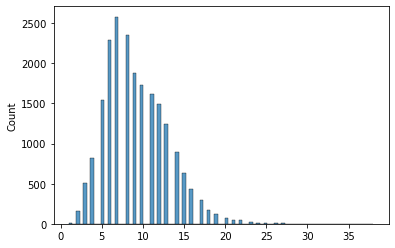

In [37]:
def avg_string_length(strings:list):
    counts = list(map(lambda x: len(x.split(" ")), strings))
    return counts, sum(counts)/len(counts), max(counts), min(counts)

counts, avg, maximum, minimum = avg_string_length(data['title'])
print("Average Corpus Title Length = ", avg)
print("Maximum Corpus Title Length = ", maximum)
print("Minimum Corpus Title Length = ", minimum)

print("\n===========================\n")
print("Distribution of count values: ")
sns.histplot(counts)

## AVERAGE CORPUS RAW ABSTRACT LENGTH & DISTRIBUTION

Average Corpus Title Length =  143.58505571959233
Maximum Corpus Title Length =  516
Minimum Corpus Title Length =  6


Distribution of count values: 


<AxesSubplot:ylabel='Count'>

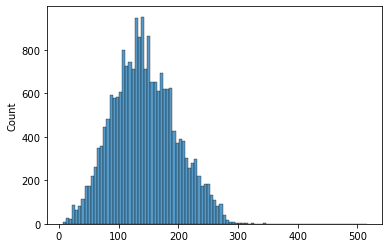

In [38]:
counts, avg, maximum, minimum = avg_string_length(data['abstract'])
print("Average Corpus Title Length = ", avg)
print("Maximum Corpus Title Length = ", maximum)
print("Minimum Corpus Title Length = ", minimum)

print("\n===========================\n")
print("Distribution of count values: ")
sns.histplot(counts)

## AVERAGE CORPUS RAW TITLE LENGTH (LABEL-WISE)

( cs.AI ) -> Average Corpus  title  Length =  9.030231105559025
( cs.AI ) -> Maximum Corpus  title  Length =  30
( cs.AI ) -> Minimum Corpus  title  Length =  1
( cs.HC ) -> Average Corpus  title  Length =  11.022222222222222
( cs.HC ) -> Maximum Corpus  title  Length =  38
( cs.HC ) -> Minimum Corpus  title  Length =  1
( cs.DB ) -> Average Corpus  title  Length =  8.740013315579228
( cs.DB ) -> Maximum Corpus  title  Length =  24
( cs.DB ) -> Minimum Corpus  title  Length =  2
( cs.CG ) -> Average Corpus  title  Length =  8.067553735926305
( cs.CG ) -> Maximum Corpus  title  Length =  27
( cs.CG ) -> Minimum Corpus  title  Length =  1
( cs.IR ) -> Average Corpus  title  Length =  9.586231369765791
( cs.IR ) -> Maximum Corpus  title  Length =  26
( cs.IR ) -> Minimum Corpus  title  Length =  1
( cs.OS ) -> Average Corpus  title  Length =  9.133079847908744
( cs.OS ) -> Maximum Corpus  title  Length =  23
( cs.OS ) -> Minimum Corpus  title  Length =  2
( cs.FL ) -> Average Corpus  titl

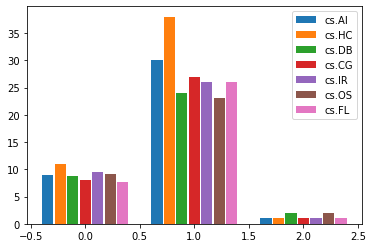

In [64]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())


def get_label_length(data, feature: str):
    to_plot = {}
    for label in labels:
        d = data[data['categories']==label].reset_index(drop=True)
        if len(d) == 0:
            print("No records for ", d)
            continue
        counts, avg, maximum, minimum = avg_string_length(d[feature])
        to_plot[label] = [avg,maximum,minimum]
        print("(" ,label,") ->","Average Corpus ",feature," Length = ", avg)
        print("(" ,label,") ->","Maximum Corpus ",feature," Length = ", maximum)
        print("(" ,label,") ->","Minimum Corpus ",feature," Length = ", minimum)
        print(" ============================================== ")
    
    fig, ax = plt.subplots()
    bar_plot(ax, to_plot, total_width=.8, single_width=.9)
    plt.show()

get_label_length(data, feature='title')

## AVERAGE CORPUS RAW ABSTRACT LENGTH (LABEL-WISE)

( cs.AI ) -> Average Corpus  abstract  Length =  137.1898813241724
( cs.AI ) -> Maximum Corpus  abstract  Length =  516
( cs.AI ) -> Minimum Corpus  abstract  Length =  7
( cs.HC ) -> Average Corpus  abstract  Length =  147.8395061728395
( cs.HC ) -> Maximum Corpus  abstract  Length =  288
( cs.HC ) -> Minimum Corpus  abstract  Length =  15
( cs.DB ) -> Average Corpus  abstract  Length =  155.68641810918774
( cs.DB ) -> Maximum Corpus  abstract  Length =  298
( cs.DB ) -> Minimum Corpus  abstract  Length =  7
( cs.CG ) -> Average Corpus  abstract  Length =  138.44165813715455
( cs.CG ) -> Maximum Corpus  abstract  Length =  320
( cs.CG ) -> Minimum Corpus  abstract  Length =  9
( cs.IR ) -> Average Corpus  abstract  Length =  159.28140525195172
( cs.IR ) -> Maximum Corpus  abstract  Length =  293
( cs.IR ) -> Minimum Corpus  abstract  Length =  6
( cs.OS ) -> Average Corpus  abstract  Length =  144.893536121673
( cs.OS ) -> Maximum Corpus  abstract  Length =  276
( cs.OS ) -> Minimum C

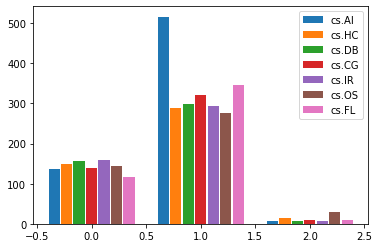

In [65]:
get_label_length(data, feature='abstract')

## ANALYZING AUTHOR DISTRIBUTION

In [74]:
authors_list = [authors.split(', ') for authors in data['authors']]
all_authors = set([item for sublist in authors_list for item in sublist])

In [75]:
data['authors'] = authors_list

In [78]:
data = data.explode('authors')
data

,title,abstract,categories,authors
0,Calculating Valid Domains for BDD-Based Intera...,In these notes we formally describe the func...,cs.AI,Tarik Hadzic
0,Calculating Valid Domains for BDD-Based Intera...,In these notes we formally describe the func...,cs.AI,Rune Moller Jensen
0,Calculating Valid Domains for BDD-Based Intera...,In these notes we formally describe the func...,cs.AI,Henrik Reif Andersen
1,A study of structural properties on profiles HMMs,Motivation: Profile hidden Markov Models (pH...,cs.AI,Juliana S Bernardes
1,A study of structural properties on profiles HMMs,Motivation: Profile hidden Markov Models (pH...,cs.AI,Alberto Davila
...,...,...,...,...
20995,Efficient and Extensible Algorithms for Multi ...,"Complex queries are becoming commonplace, wi...",cs.DB,S. Sudarshan
20995,Efficient and Extensible Algorithms for Multi ...,"Complex queries are becoming commonplace, wi...",cs.DB,Siddhesh Bhobe
20996,Cox's Theorem Revisited,The assumptions needed to prove Cox's Theore...,cs.AI,Joseph Y. Halpern
20997,Comparative Analysis of Five XML Query Languages,XML is becoming the most relevant new standa...,cs.DB,Angela Bonifati


63it [00:00, 286.41it/s]

Total number of authors =  41679


41679it [01:59, 348.07it/s]

Average Categories Count =  1.0417716355958637
Maximum Categories Count =  5
Minimum Categories Count =  1


Distribution of count values: 


<AxesSubplot:ylabel='Count'>

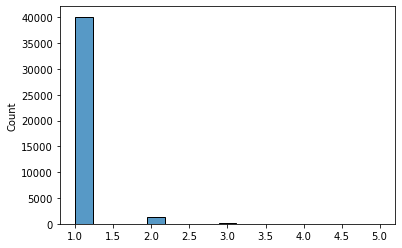

In [82]:
print("Total number of authors = ", len(all_authors))
author_count = []
for index, author in tqdm(enumerate(all_authors)):
    author_df = data[data['authors']==author]
    labels = list(set(author_df['categories'].tolist()))
    author_count.append(len(labels))

print("Average Categories Count = ", sum(author_count)/len(author_count))
print("Maximum Categories Count = ", max(author_count))
print("Minimum Categories Count = ", min(author_count))

print("\n===========================\n")
print("Distribution of count values: ")
sns.histplot(author_count)